### kNN
- k-최근접 이웃(Nearlest Neighbors) 알고리즘은 가장 간단한 머신러닝 알고리즘

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC3/blob/main/gg-34-kNN.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC3/blob/main/gg-34-kNN.ipynb"><img src="https://github.com/swkim01/DSAC3/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
iris = load_iris()

iris 는 딕셔너리와 유사한 Bunch 클래스

In [ ]:
print("iris_dataset의 키: \n{}".format(iris.keys()))

- 데이터셋에 대한 설명

In [ ]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print("타깃의 이름: {}".format(iris['target_names']))
print("특성의 이름: \n{}".format(iris['feature_names']))

타깃의 이름: ['setosa' 'versicolor' 'virginica']
특성의 이름: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


- iris.data : feature들의 값
- iris.target : 0(setosa), 1(versicolor), 2(virginica)

In [ ]:
X, y = iris.data, iris.target
print("data의 처음 다섯 행:\n{}".format(X[:5]))

data의 처음 다섯 행:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


- target : 샘플 붓꽃의 품종을 담은 numpy 배열

In [ ]:
print("타깃:\n{}".format(y))

타깃:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 산점도를 통한 데이터 분석
- 데이터의 한 특성을 x축, 다른 특성을 y축으로 데이터를 나타낸 그래프
- 한번에 2개(또는 3개)만 나타내므로 모든 특성을 짝으로 행렬로 가능
- Matplotlib의 scatter plot 기능이나 pandas 의 scatter_matrix 함수 사용

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f460a591780>,
      dtype=object)

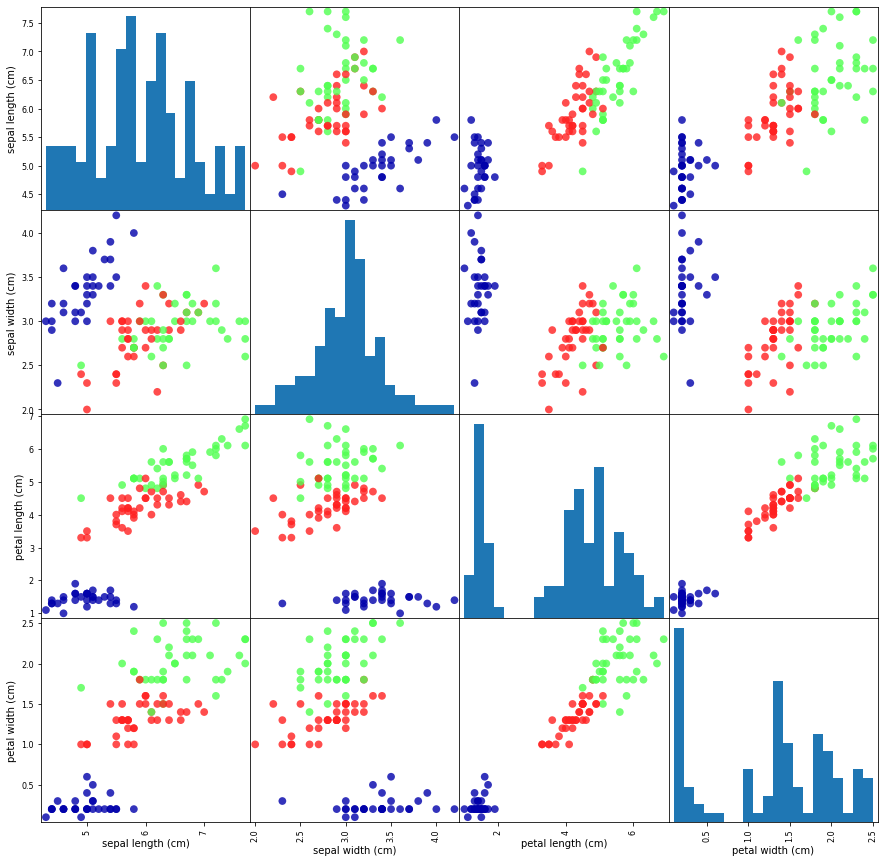

In [ ]:
import pandas as pd
from matplotlib.colors import ListedColormap

iris_dataframe = pd.DataFrame(X_train, columns=iris.feature_names)
# 데이터프레임을 사용해 y_train에 따라 색으로 구분된 산점도 행렬을 만듭니다.
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15), marker='o',
		hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=ListedColormap(['#0000aa', '#ff2020', '#50ff50']))

### KNeighborsClassifier
- n_neighbors : 이웃의 수

In [ ]:
clf = SGDClassifier()
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, y_train)
print("kNN score: {:.2f}".format(knn.score(X_test, y_test)))
clf.fit(X_train, y_train)
print("Linear Reg score: {:.2f}".format(clf.score(X_test, y_test)))

Text(0, 0.5, 'Sepal width')

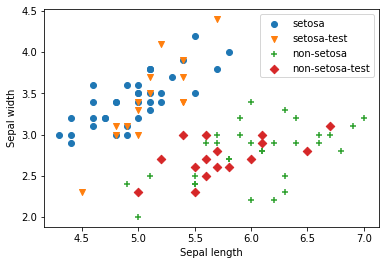

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

markers = ['o', '+', '^']
markert = ['v', 'D', 's']
for i in range(2):
    xs = X_train[:, 0][y_train == i]
    ys = X_train[:, 1][y_train == i]
    plt.scatter(xs, ys, marker=markers[i])
    xt = X_test[:, 0][y_test == i]
    yt = X_test[:, 1][y_test == i]
    plt.scatter(xt, yt, marker=markert[i])

binary_names = ['setosa', 'setosa-test', 'non-setosa', 'non-setosa-test']
plt.legend(binary_names)
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

In [ ]:
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    print("K가", i, "일때 정확도: {:.2f}".format(knn.score(X_test, y_test)))

K가 1 일때 정확도: 0.96
K가 2 일때 정확도: 0.91
K가 3 일때 정확도: 0.96
K가 4 일때 정확도: 0.96
K가 5 일때 정확도: 0.98
K가 6 일때 정확도: 0.98
K가 7 일때 정확도: 0.98
K가 8 일때 정확도: 0.96
K가 9 일때 정확도: 0.98


## 교차 검증

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
cross_val_score(knn, X, y, cv=5).mean().round(4)

0.9733

In [ ]:
cross_val_score(clf, X, y, cv=5).mean().round(4)

0.7

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)
cross_val_score(clf, X_sc, y, cv=5).mean().round(4)

0.94